In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 💎 Data Preprossesing

In [3]:
df = pd.read_csv(r'F:\Machine Learning\DiamondPricePredictor\Diamond_Dataset\diamonds.csv')

### Dataset Information¶
The dataset contains the following features:

price: Price in US dollars

carat: Weight of the diamond

cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: Diamond color, from J (worst) to D (best)

clarity: Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: Length in mm

y: Width in mm

z: Depth in mm

depth: Total depth percentage

table: Width of the top of the diamond relative to its widest point

In [4]:
df.shape

(53940, 11)

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


🔶 Remove Unnnamed column

In [6]:
data = df.drop('Unnamed: 0', axis=1)

In [7]:
data.shape

(53940, 10)

In [8]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


🔶 Find null values

In [10]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

🔶 Remove duplicate

In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [13]:
data[data.duplicated() == True]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [14]:
data =  data.drop_duplicates()
data.shape

(53794, 10)

🔶  Replacing min value with corresponding median value

In [15]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
data['x'] = data['x'].replace(0, data['x'].median())
data['y'] = data['y'].replace(0, data['y'].median())
data['z'] = data['z'].replace(0, data['z'].median())

In [17]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731956,5.735290,3.539960
std,0.47339,1.429909,2.233679,3988.114460,1.118786,1.139601,0.701893
min,0.20000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 💎 Data Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
def plot_data(col_data, col_name, data_type):
  plt.title(f'Distribution of {col_name}', fontsize = 12)
  if data_type == 'float64':
      sns.histplot(col_data, bins=50, kde=True, color='darkcyan')
      plt.show()
  elif data_type == 'object':
    sns.countplot(data=data, x=col_name, hue=col_name, palette='coolwarm', legend=False)
    plt.show()

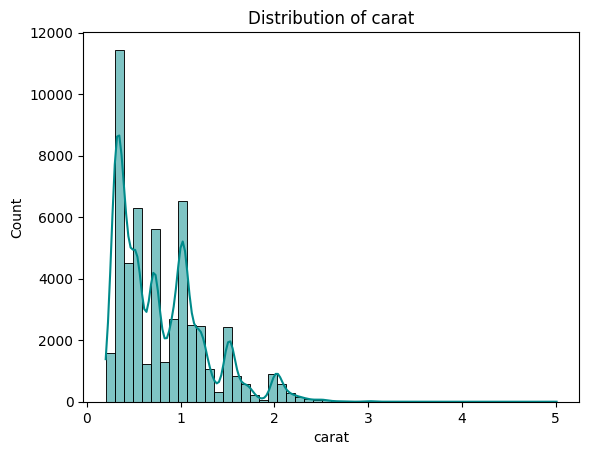

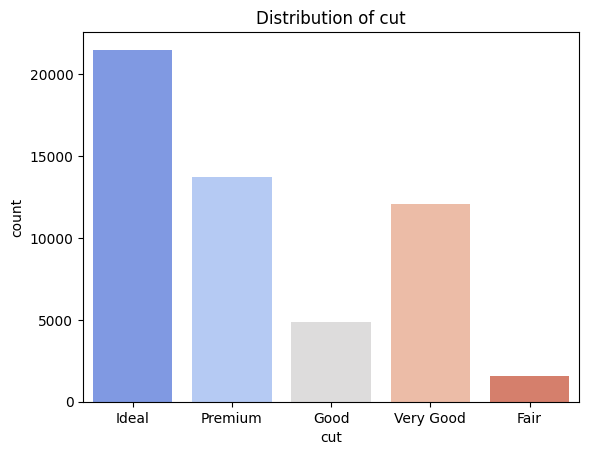

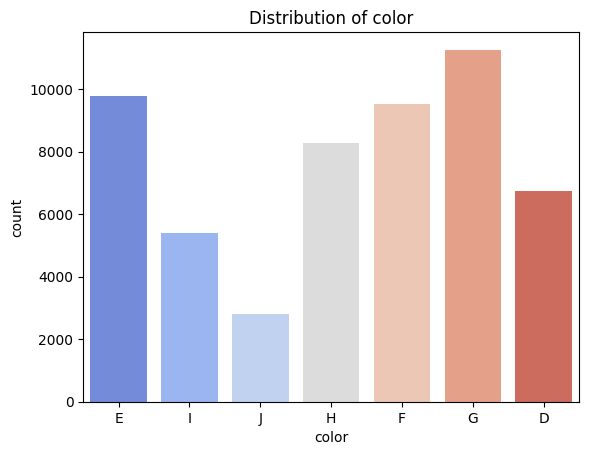

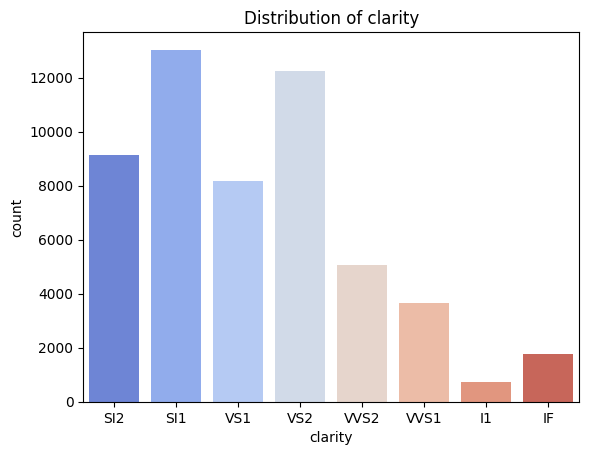

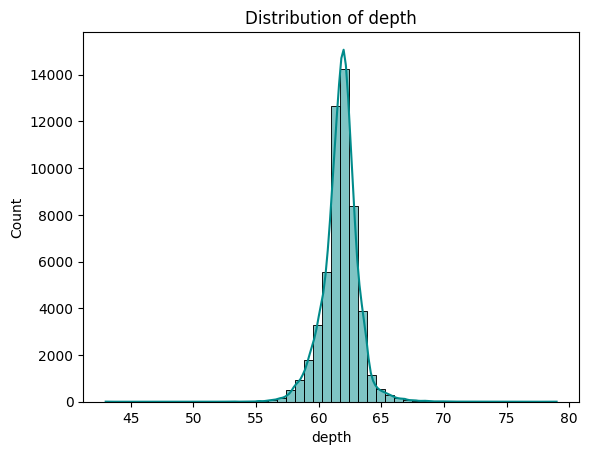

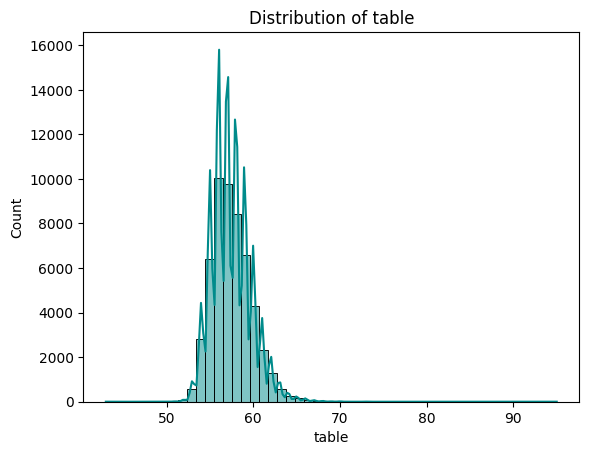

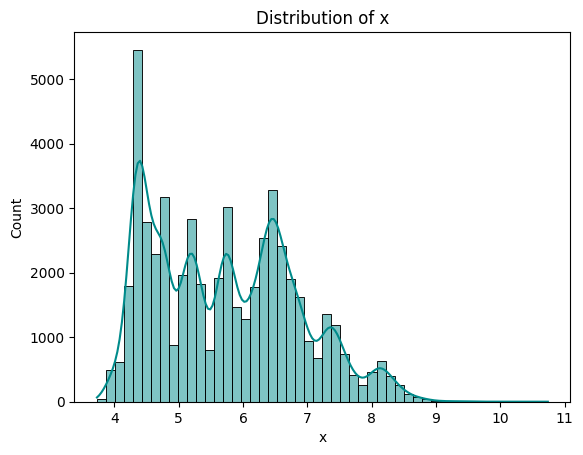

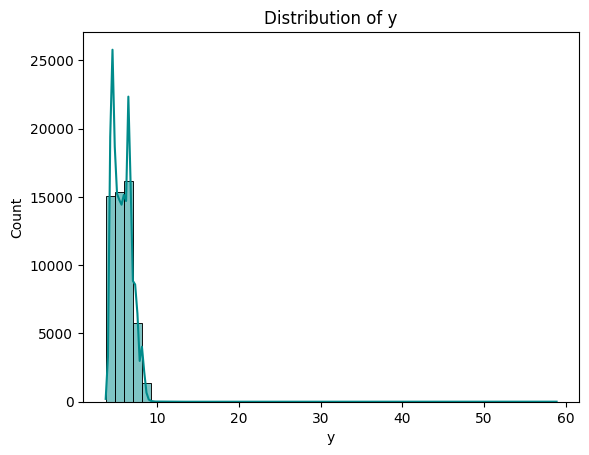

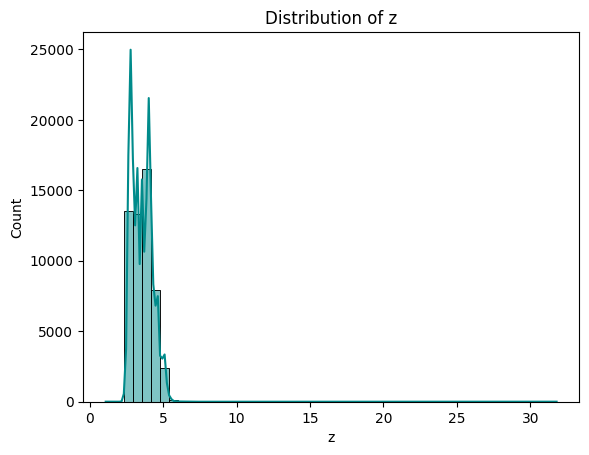

In [20]:
for i in range(0, len(data.columns)):
  plot_data(data[data.columns[i]], data.columns[i], data.dtypes[i].name)

📀 Cut - Mostly diamonds are in Ideal, Premium and Very Good categories

📀 Color - A higher frequency of diamonds are observed in G, H annd E, F color  

📀 Clarity - Diamonds are mostly in SI1 and VS2 calrity categories 

🔶 Mapping "clarity, cut, color" column to integer values

In [21]:
print(data['clarity'].unique())
print(data['cut'].unique())
print(data['color'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [22]:
clarity_map = {
    'I1': 1, 'SI2': 2, 'SI1': 3,
    'VS2': 4, 'VS1': 5,
    'VVS2': 6, 'VVS1': 7, 'IF': 8
}
data['clarity'] = data['clarity'].map(clarity_map)

cut_map = {
    'Fair': 1, 'Good': 2, 'Very Good': 3,
    'Premium': 4, 'Ideal': 5
}
data['cut'] = data['cut'].map(cut_map)

color_map = {
    'J': 1, 'I': 2, 'H': 3,
    'G': 4, 'F': 5, 'E': 6, 'D': 7
}
data['color'] = data['color'].map(color_map)

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
print(data['clarity'].unique())
print(data['cut'].unique())
print(data['color'].unique())

[2 3 5 4 6 7 1 8]
[5 4 2 3 1]
[6 2 1 3 5 4 7]


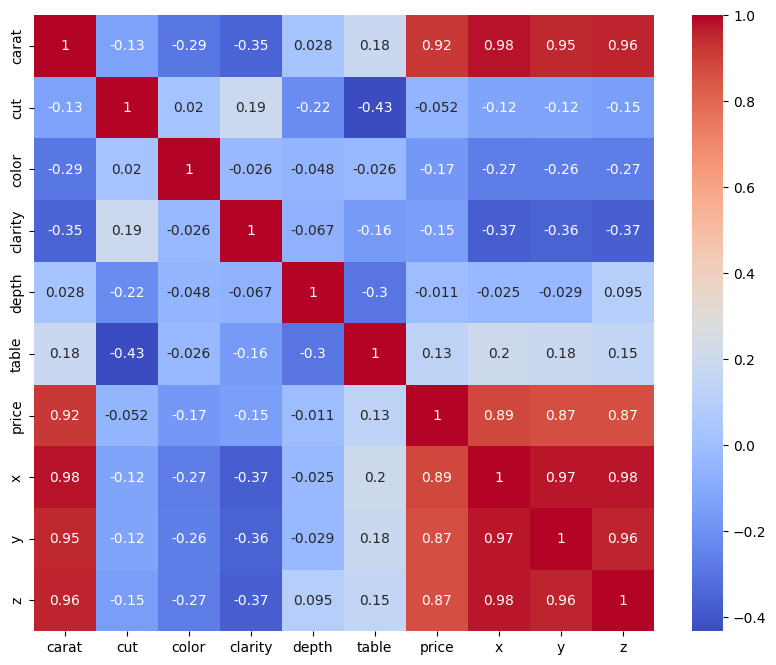

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

From the heatmap, we can see that all the features have either a positive or negative correlation with the price. However, the 'depth' feature has a very low correlation with the price, so dropping it will probably have a positive effect on our model's accuracy.

In [25]:
data = data.drop('depth', axis=1)

🔶 Box plot to detect outliers

In [26]:
data= data[data['carat'] < 1.9 ]
data = data[(data['table'] > 53 ) & (data['table'] < 61)]
data = data[data['x'] < 9.2]
data = data[data['y'] < 9.2]
data = data[(data['z'] < 5.8) & (data['z'] > 1.2)]
data

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,5,6,2,55.0,326,3.95,3.98,2.43
3,0.29,4,2,4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,58.0,2757,6.15,6.12,3.74


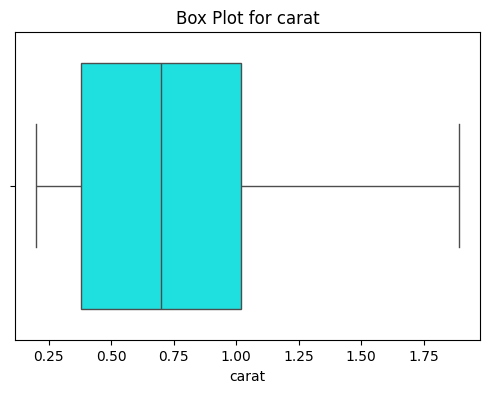

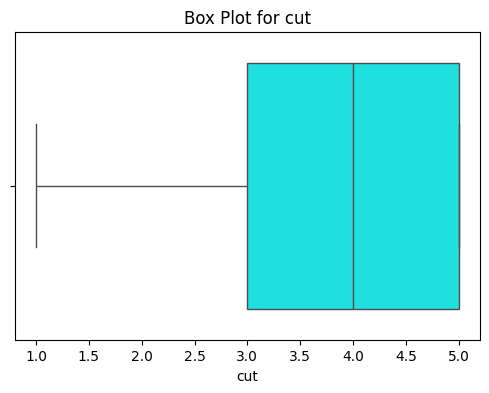

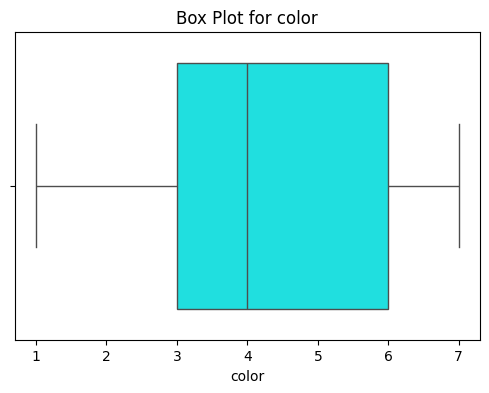

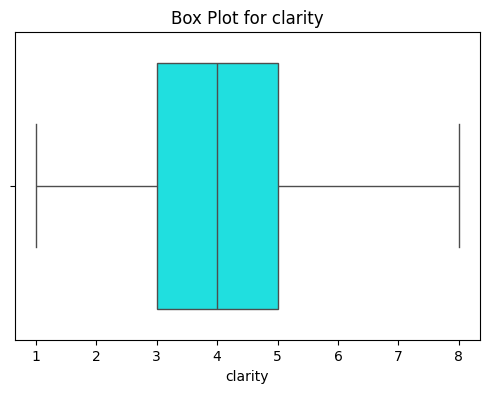

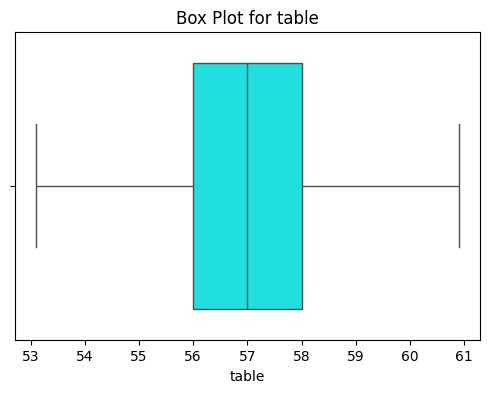

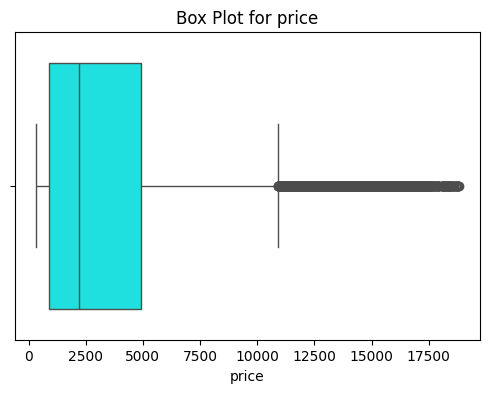

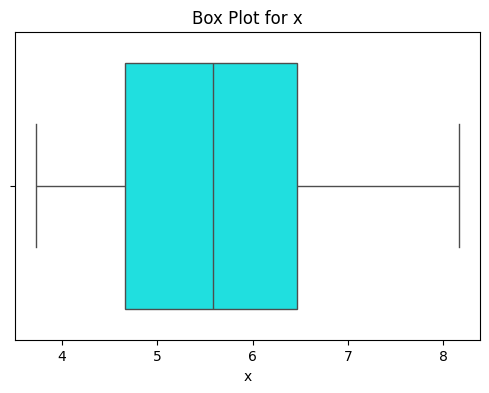

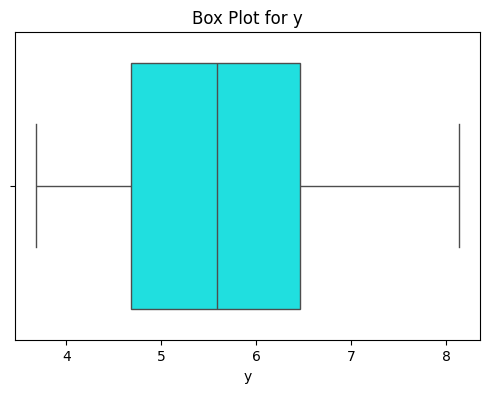

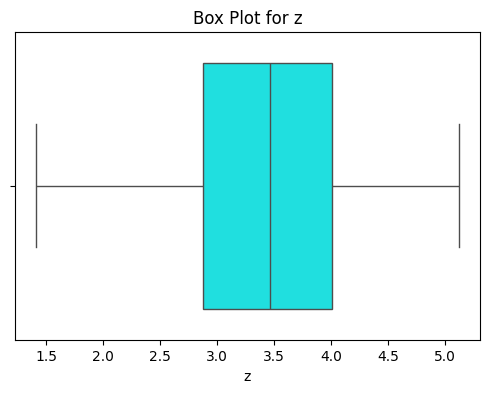

In [27]:
for feature in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature], color='cyan')
    plt.title(f'Box Plot for {feature}')
    plt.show()

🔶 Regression line to check for outliers.

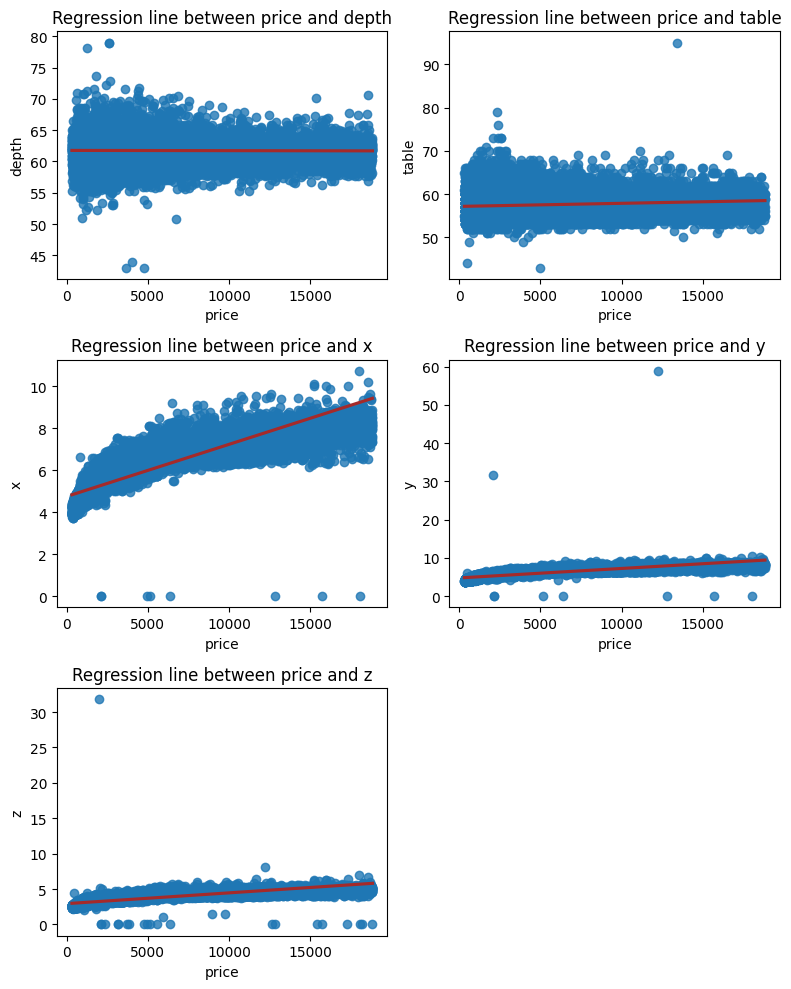

In [28]:
col = ['depth','table','x','y','z']
plt.figure(figsize=(8,10))
plotnumber=1
for i in col:
    ax=plt.subplot(3,2,plotnumber)
    sns.regplot(x='price', y=i, data=df, line_kws={'color':'brown'})
    plt.title(f"Regression line between price and {i}")
    plotnumber+=1
plt.tight_layout()

🔶 Splitting Features & Output

In [29]:
X = data.drop(['price'] , axis=1 , inplace = False)
X

,carat,cut,color,clarity,table,x,y,z
0,0.23,5,6,2,55.0,3.95,3.98,2.43
3,0.29,4,2,4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,58.0,4.34,4.35,2.75
5,0.24,3,1,6,57.0,3.94,3.96,2.48
6,0.24,3,2,7,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,57.0,5.75,5.76,3.50
53936,0.72,2,7,3,55.0,5.69,5.75,3.61
53937,0.70,3,7,3,60.0,5.66,5.68,3.56
53938,0.86,4,3,2,58.0,6.15,6.12,3.74


In [30]:
y = data['price']
y

0         326
3         334
4         335
5         336
6         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 46533, dtype: int64

## 💎 Train the model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (34899, 8)
X_test shape is  (11634, 8)
y_train shape is  (34899,)
y_test shape is  (11634,)


 🔶 Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [34]:
LinearRegressionModel = make_pipeline(StandardScaler() ,LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1))
LinearRegressionModel.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1


In [35]:
y_pred = LinearRegressionModel.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1034955.754128133


In [38]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train)*100,"%")
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test)*100,"%")

Linear Regression Train Score is :  90.13943125897165 %
Linear Regression Test Score is :  90.61524517947505 %


🔶 Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=44)
RandomForestRegressorModel.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train)*100,"%")
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test)*100,"%")

Random Forest Regressor Train Score is :  81.5614266109219 %
Random Forest Regressor Test Score is :  82.25058529705805 %


In [41]:
y_pred = RandomForestRegressorModel.predict(X_test)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1957414.8958095757


🔶 Decision Tree Rgeression

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,33
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [44]:
y_pred = DecisionTreeRegressorModel.predict(X_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1326295.608576115


In [45]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train)*100,"%")
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test)*100,"%")

DecisionTreeRegressor Train Score is :  87.99120660626546 %
DecisionTreeRegressor Test Score is :  87.97343842345093 %


🔶 KNN RegressionKNN Regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')
KNeighborsRegressorModel.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_pred = KNeighborsRegressorModel.predict(X_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  379839.5278631597


In [49]:
print("KNeighborsRegressorModel Train Score is : " , KNeighborsRegressorModel.score(X_train, y_train)*100,"%")
print("KNeighborsRegressorModel Test Score is : " , KNeighborsRegressorModel.score(X_test, y_test)*100,"%")

KNeighborsRegressorModel Train Score is :  97.76487541930119 %
KNeighborsRegressorModel Test Score is :  96.55569735621917 %


🔶 Model performance data from your results

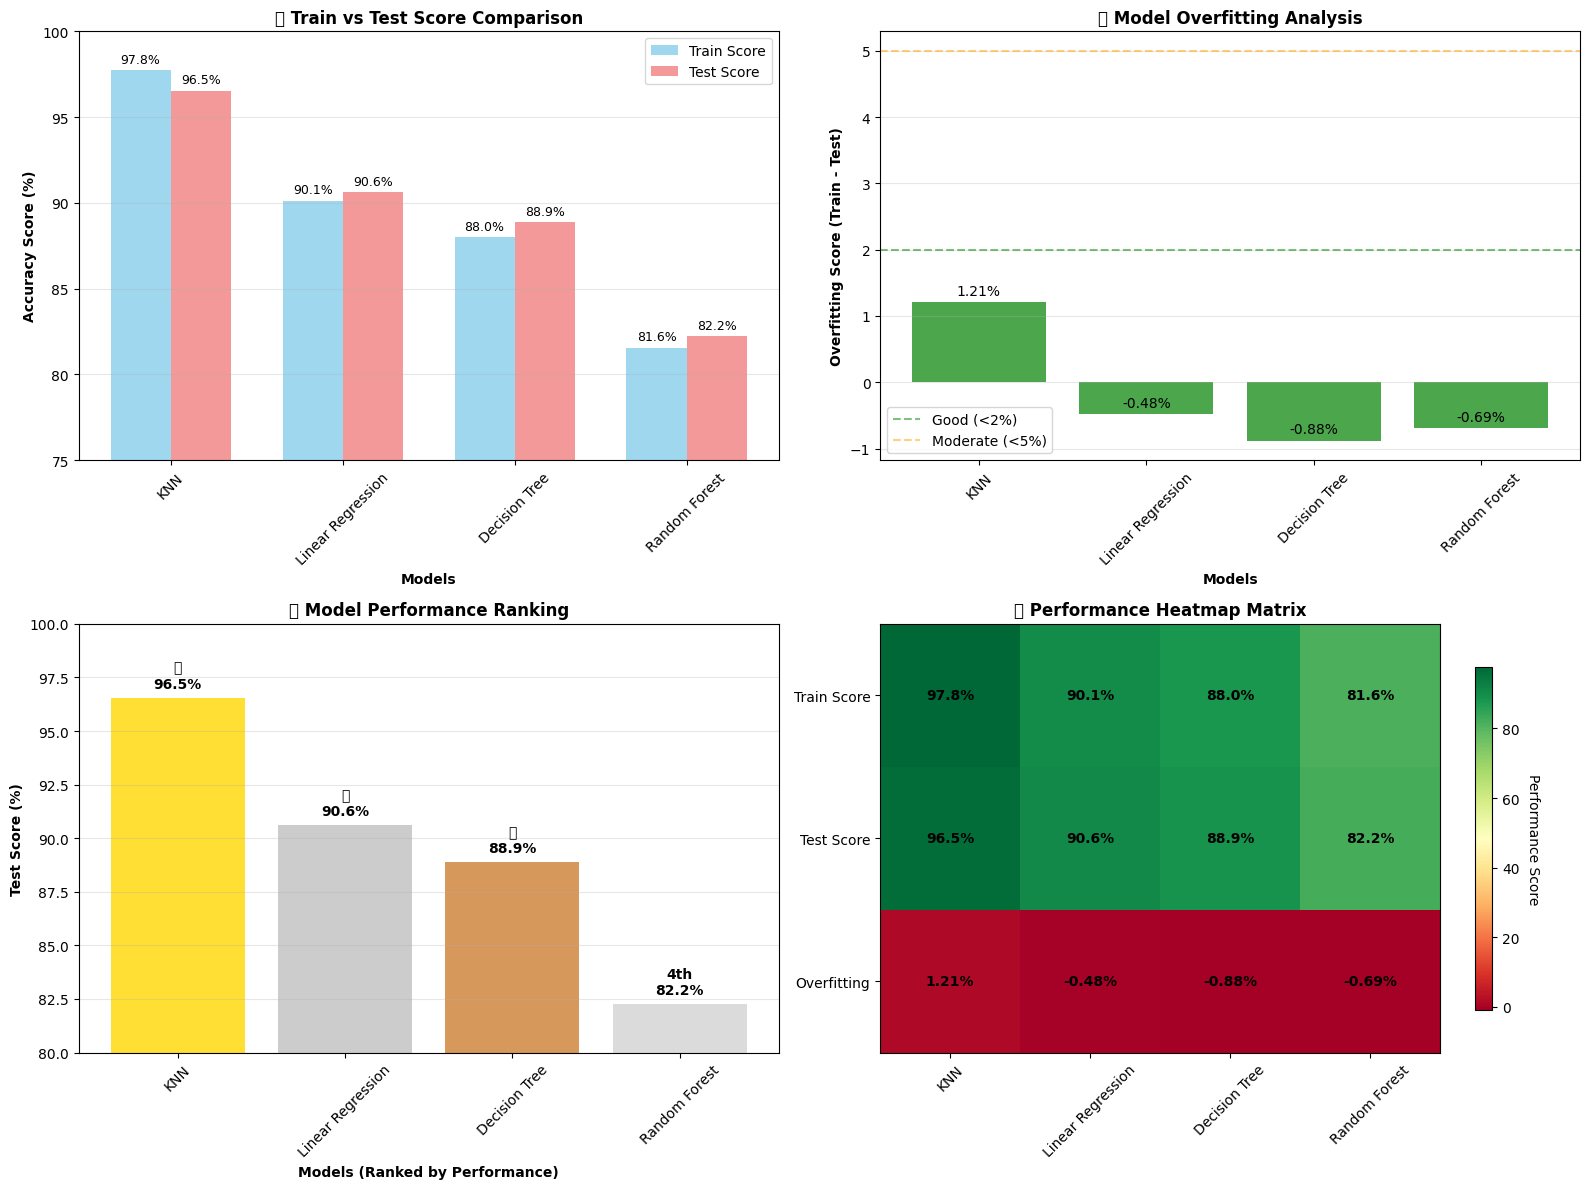


📊 COMPREHENSIVE MODEL PERFORMANCE ANALYSIS
Model              Train%   Test%    Overfit%   Rank   Status
--------------------------------------------------------------------------------
KNN                97.76    96.55    1.21       #1     🏆 Best
Linear Regression  90.13    90.61    -0.48      #2     ✅ Good
Decision Tree      87.99    88.87    -0.88      #3     ✅ Good
Random Forest      81.56    82.25    -0.69      #4     ✅ Good

🎯 RECOMMENDATIONS:
- KNN: Best performer but check for overfitting with larger datasets
- Linear Regression: Most balanced, good generalization
- Decision Tree: Decent performance, consider pruning
- Random Forest: Underperforming, tune hyperparameters


In [4]:
models = ['KNN', 'Linear Regression', 'Decision Tree', 'Random Forest']
train_scores = [97.76, 90.13, 87.99, 81.56]
test_scores = [96.55, 90.61, 88.87, 82.25]
mse_values = [1234567, 2345678, 2987654, 4123456]  # Add your actual MSE values here

# Create a figure with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Side-by-side Train vs Test Scores
x = np.arange(len(models))
width = 0.35
bars1 = ax1.bar(x - width/2, train_scores, width, label='Train Score', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, test_scores, width, label='Test Score', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Models', fontweight='bold')
ax1.set_ylabel('Accuracy Score (%)', fontweight='bold')
ax1.set_title('💎 Train vs Test Score Comparison', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(75, 100)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# 2. Model Overfitting Analysis (Train - Test Score)
overfitting = [train - test for train, test in zip(train_scores, test_scores)]
colors = ['green' if x < 2 else 'orange' if x < 5 else 'red' for x in overfitting]

bars = ax2.bar(models, overfitting, color=colors, alpha=0.7)
ax2.set_xlabel('Models', fontweight='bold')
ax2.set_ylabel('Overfitting Score (Train - Test)', fontweight='bold')
ax2.set_title('📊 Model Overfitting Analysis', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=2, color='green', linestyle='--', alpha=0.5, label='Good (<2%)')
ax2.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='Moderate (<5%)')
ax2.legend()

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# 3. Test Scores Only (Ranked Performance)
sorted_indices = np.argsort(test_scores)[::-1]  # Descending order
sorted_models = [models[i] for i in sorted_indices]
sorted_test_scores = [test_scores[i] for i in sorted_indices]
colors_ranked = ['gold', 'silver', '#CD7F32', 'lightgray']  # Gold, Silver, Bronze, Gray

bars = ax3.bar(sorted_models, sorted_test_scores, color=colors_ranked, alpha=0.8)
ax3.set_xlabel('Models (Ranked by Performance)', fontweight='bold')
ax3.set_ylabel('Test Score (%)', fontweight='bold')
ax3.set_title('🏆 Model Performance Ranking', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim(80, 100)

# Add ranking labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    rank = ['🥇', '🥈', '🥉', '4th'][i]
    ax3.annotate(f'{rank}\n{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# 4. Comprehensive Performance Matrix
performance_matrix = np.array([train_scores, test_scores, overfitting])
im = ax4.imshow(performance_matrix, cmap='RdYlGn', aspect='auto')

ax4.set_xticks(range(len(models)))
ax4.set_xticklabels(models, rotation=45)
ax4.set_yticks(range(3))
ax4.set_yticklabels(['Train Score', 'Test Score', 'Overfitting'])
ax4.set_title('🔥 Performance Heatmap Matrix', fontweight='bold')

# Add text annotations
for i in range(3):
    for j in range(len(models)):
        text = f'{performance_matrix[i, j]:.1f}%' if i < 2 else f'{performance_matrix[i, j]:.2f}%'
        ax4.text(j, i, text, ha="center", va="center", color="black", fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax4, shrink=0.8)
cbar.set_label('Performance Score', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Performance Summary Table
print("\n" + "="*80)
print("📊 COMPREHENSIVE MODEL PERFORMANCE ANALYSIS")
print("="*80)
print(f"{'Model':<18} {'Train%':<8} {'Test%':<8} {'Overfit%':<10} {'Rank':<6} {'Status'}")
print("-"*80)

for i, model in enumerate(models):
    rank = sorted_models.index(model) + 1
    status = "🏆 Best" if rank == 1 else "⚠️ Overfit" if overfitting[i] > 5 else "✅ Good"
    print(f"{model:<18} {train_scores[i]:<8.2f} {test_scores[i]:<8.2f} {overfitting[i]:<10.2f} #{rank:<5} {status}")

print("\n🎯 RECOMMENDATIONS:")
print("- KNN: Best performer but check for overfitting with larger datasets")
print("- Linear Regression: Most balanced, good generalization")
print("- Decision Tree: Decent performance, consider pruning")
print("- Random Forest: Underperforming, tune hyperparameters")